In [1]:
# Arithematic operations
import numpy as np

#for graphics and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data manipulation
import pandas as pd

In [2]:
df=pd.read_csv('TrainSet.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.shape

(10683, 11)

In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df[df['Route'].isna() | df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.shape

(10682, 11)

Exploratory Data Analysis (EDA)

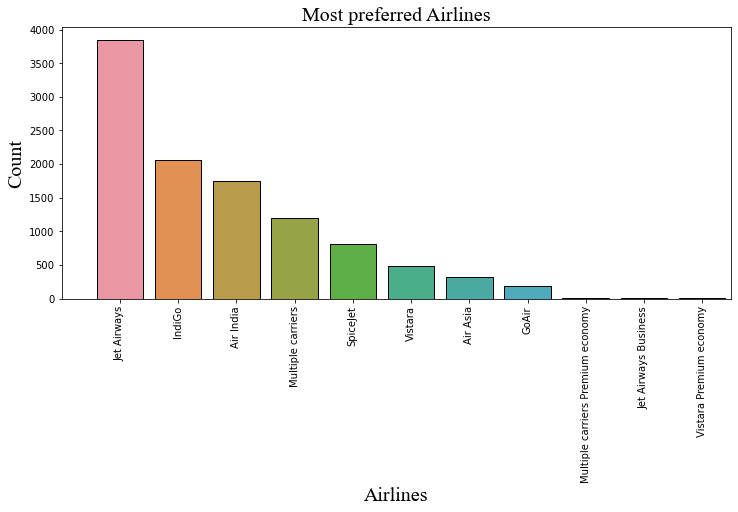

In [11]:
# Bar graph to depict the most preferred Airlines

plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=df,order = df['Airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

# Most preferred is Jet Airways
# Second is Indigo

In [12]:
# Airlines Vs price

airlines = df.groupby('Airline').Price.max()
airlines_df= airlines.to_frame().sort_values('Price',ascending=False)[0:10]
airlines_df

# Jet Airways Business has the highest Price

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


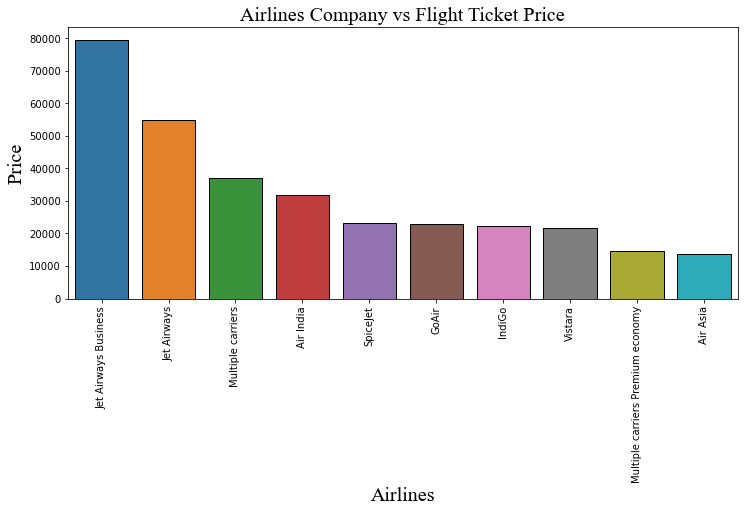

In [13]:
# Bar graph - Airlines Vs price

plt.subplots(figsize=(12,5))
sns.barplot(x=airlines_df.index, y=airlines_df["Price"],ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Airlines Company vs Flight Ticket Price",fontdict=font_style )
plt.ylabel("Price", fontdict=font_style)
plt.xlabel("Airlines", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

In [14]:
# Weekend Vs Weekdays

days_df=df[['Airline','Date_of_Journey', 'Price']].copy()
days_df['Date_of_Journey']=pd.to_datetime(days_df['Date_of_Journey'],format='%d/%m/%Y')
days_df['Weekday']=days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend']=days_df['Weekday'].apply(lambda day: 1 if day=='Sunday' or day=='Saturday' else 0)
days_df

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897,Sunday,1
1,Air India,2019-05-01,7662,Wednesday,0
2,Jet Airways,2019-06-09,13882,Sunday,1
3,IndiGo,2019-05-12,6218,Sunday,1
4,IndiGo,2019-03-01,13302,Friday,0
...,...,...,...,...,...
10678,Air Asia,2019-04-09,4107,Tuesday,0
10679,Air India,2019-04-27,4145,Saturday,1
10680,Jet Airways,2019-04-27,7229,Saturday,1
10681,Vistara,2019-03-01,12648,Friday,0


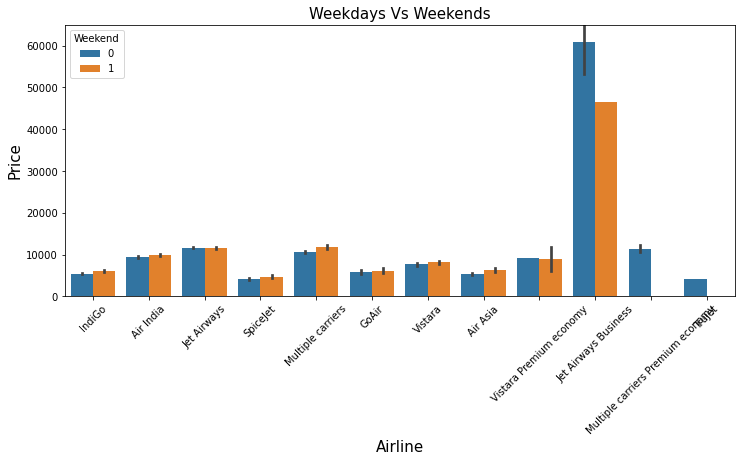

In [15]:
# Bar graph - Weekend Vs Weekdays

plt.subplots(figsize=(12,5))
sns.barplot(data=days_df,x='Airline',y='Price',hue='Weekend')
plt.xlabel("Airline",size = 15)
plt.xticks(rotation = 45)
plt.ylabel("Price",size = 15)
plt.title("Weekdays Vs Weekends",size = 15)
plt.legend(title='Weekend'.title())
plt.ylim(0,65000)
plt.show()

# Price is higher during weekends

Feature Engineering

In [16]:
df["Journey_date"]=df["Date_of_Journey"].str.split("/").str[0].astype(int)
df["Journey_month"]=df["Date_of_Journey"].str.split("/").str[1].astype(int)
df["Journey_year"]=df["Date_of_Journey"].str.split("/").str[2].astype(int)

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [18]:
df=df.drop(['Date_of_Journey'],axis=1)

In [19]:
df=df.drop(['Journey_year'],axis=1)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [20]:
df['Total_Stops']=df['Total_Stops'].str.split(" ").str[0]
df['Total_Stops']=df['Total_Stops'].replace("non-stop","0")
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3


In [21]:
df["Duration_hr"]=df["Duration"].str.split(' ').str[0].str.split('h').str[0]

In [22]:
df["Duration_min"]=df["Duration"].str.split(' ').str[1].str.split('m').str[0]

In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,4,45


In [24]:
df['Duration_min'].fillna("0",inplace=True)

In [25]:
df['Duration_hr'].str.contains('h').sum()

0

In [26]:
df['Duration_hr'].str.contains('m').sum()

1

In [27]:
df['Duration_min'].str.contains('h').sum()

0

In [28]:
df['Duration_min'].str.contains('m').sum()

0

In [29]:
df[df['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2,No info,17327,6,3,5m,0


In [30]:
df.loc[[6474], 'Duration_min'] = df.loc[[6474], 'Duration_hr']
df.loc[df['Duration_min'] == '5m', 'Duration_min'] = 5

In [31]:
df["Duration_hr"]=df["Duration_hr"].replace("5m","0")

In [32]:
df['Duration_hr'].str.contains('m').sum()

0

In [33]:
df["Duration_hr"] = df["Duration_hr"].astype(int)

In [34]:
df["Duration_min"] = df["Duration_min"].astype(int)

In [35]:
df["Duration"] = (df["Duration_hr"]*60) + df["Duration_min"]
df=df.drop(['Duration_hr','Duration_min'],axis=1)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302,1,3


In [36]:
df['Dept_Hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dept_Min']=pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'],axis=1,inplace=True)

In [37]:
df['Arr_Hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [38]:
# df=df.drop(['Additional_Info','Route'], axis = 1, inplace = True)

In [39]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_date       0
Journey_month      0
Dept_Hr            0
Dept_Min           0
Arr_Hr             0
Arr_Min            0
dtype: int64

In [40]:
df['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [41]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration            int32
Total_Stops        object
Additional_Info    object
Price               int64
Journey_date        int32
Journey_month       int32
Dept_Hr             int64
Dept_Min            int64
Arr_Hr              int64
Arr_Min             int64
dtype: object

In [42]:
df["Total_Stops"]=df["Total_Stops"].fillna('1')

In [43]:
df["Total_Stops"]=df["Total_Stops"].astype(int)

In [44]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_date       0
Journey_month      0
Dept_Hr            0
Dept_Min           0
Arr_Hr             0
Arr_Min            0
dtype: int64

One Hot Encoding for categorial data

In [45]:
# from sklearn.preprocessing import LabelEncoder
# la=LabelEncoder()
# for i in ["Airline","Source","Destination"]:
#     df[i]=la.fit_transform(df[i])
# df.head()

In [46]:
# Airline
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [47]:
Airline=pd.get_dummies(df['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [48]:
df=pd.concat([df,Airline],axis=1)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,...,0,1,0,0,0,0,0,0,0,0


In [49]:
df.drop('Airline',axis=1,inplace=True)

In [50]:
# Source and destination
list1=['Source','Destination']
for i in list1:
    print(df[[i]].value_counts(),'\n')

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64 

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
dtype: int64 



In [51]:
df=pd.get_dummies(data=df,columns=list1,drop_first=True)
df.head()

,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dept_Hr,Dept_Min,Arr_Hr,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,0,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [52]:
# Route
route=df[['Route']]
route['Route_1']=route['Route'].str.split('→').str[0]
route['Route_2']=route['Route'].str.split('→').str[1]
route['Route_3']=route['Route'].str.split('→').str[2]
route['Route_4']=route['Route'].str.split('→').str[3]
route['Route_5']=route['Route'].str.split('→').str[4]
route.head()

C:\Users\Harshita V M\AppData\Local\Temp\ipykernel_20464\3454196162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_1']=route['Route'].str.split('→').str[0]
C:\Users\Harshita V M\AppData\Local\Temp\ipykernel_20464\3454196162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_2']=route['Route'].str.split('→').str[1]
C:\Users\Harshita V M\AppData\Local\Temp\ipykernel_20464\3454196162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [53]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in range(1,6):
    col='Route_'+str(i)
    route[col]=le.fit_transform(route[col])
route.head()

C:\Users\Harshita V M\AppData\Local\Temp\ipykernel_20464\3174982210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col]=le.fit_transform(route[col])


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [54]:
route.drop('Route',axis=1,inplace=True)
route.head()

C:\Users\Harshita V M\AppData\Local\Temp\ipykernel_20464\2170783715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.drop('Route',axis=1,inplace=True)


,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,13,29,13,5
1,2,25,1,3,5
2,3,32,4,5,5
3,2,34,3,13,5
4,0,34,8,13,5


In [55]:
df=pd.concat([df,route],axis=1)
df.head()

,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dept_Hr,Dept_Min,Arr_Hr,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,170,0,No info,3897,24,3,22,20,1,...,0,0,0,0,1,0,13,29,13,5
1,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,...,0,0,0,0,0,2,25,1,3,5
2,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,...,1,0,0,0,0,3,32,4,5,5
3,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,...,0,0,0,0,0,2,34,3,13,5
4,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,...,0,0,0,0,1,0,34,8,13,5


In [56]:
df.drop('Route',axis=1,inplace=True)
df.head()

,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dept_Hr,Dept_Min,Arr_Hr,Arr_Min,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,170,0,No info,3897,24,3,22,20,1,10,...,0,0,0,0,1,0,13,29,13,5
1,445,2,No info,7662,1,5,5,50,13,15,...,0,0,0,0,0,2,25,1,3,5
2,1140,2,No info,13882,9,6,9,25,4,25,...,1,0,0,0,0,3,32,4,5,5
3,325,1,No info,6218,12,5,18,5,23,30,...,0,0,0,0,0,2,34,3,13,5
4,285,1,No info,13302,1,3,16,50,21,35,...,0,0,0,0,1,0,34,8,13,5


In [57]:
df.drop('Additional_Info',axis=1,inplace=True)
df.head()

,Duration,Total_Stops,Price,Journey_date,Journey_month,Dept_Hr,Dept_Min,Arr_Hr,Arr_Min,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,170,0,3897,24,3,22,20,1,10,0,...,0,0,0,0,1,0,13,29,13,5
1,445,2,7662,1,5,5,50,13,15,1,...,0,0,0,0,0,2,25,1,3,5
2,1140,2,13882,9,6,9,25,4,25,0,...,1,0,0,0,0,3,32,4,5,5
3,325,1,6218,12,5,18,5,23,30,0,...,0,0,0,0,0,2,34,3,13,5
4,285,1,13302,1,3,16,50,21,35,0,...,0,0,0,0,1,0,34,8,13,5


Feature Selection

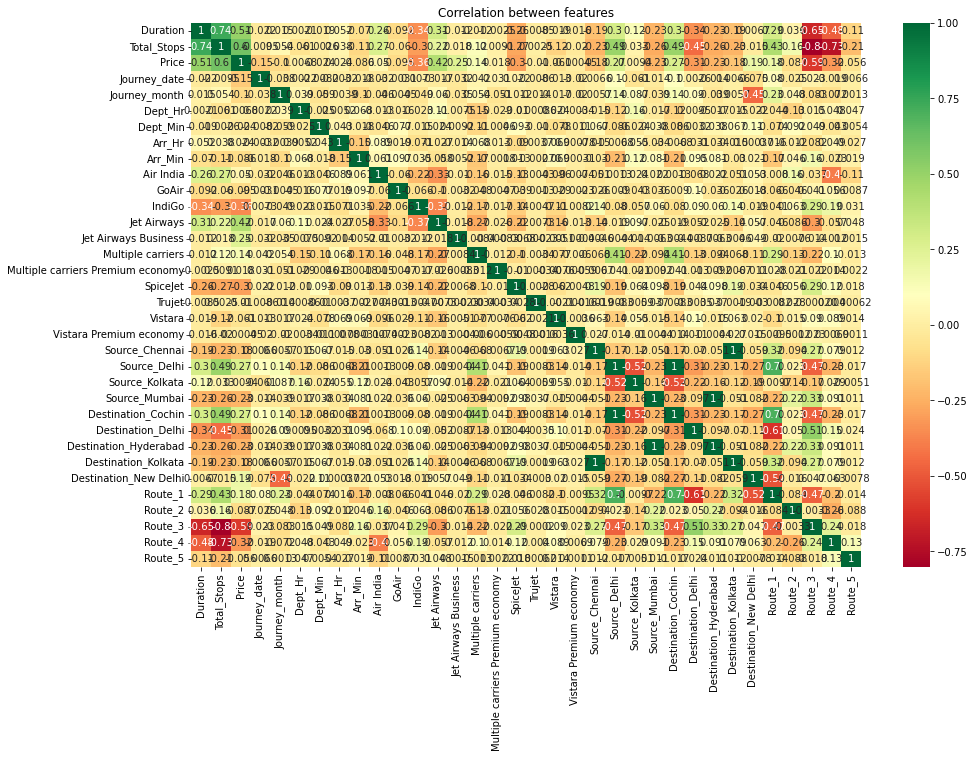

In [58]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.title("Correlation between features")

plt.show()

# There is a high correlation between:
# Price & Total Stops
# Price & flight duration
# Duration & Total stops

In [59]:
# Relocating the Price column to the end
temp_col=df.columns.to_list()
new_col=temp_col[:2]+temp_col[3:]
new_col.append(temp_col[2])

df=df.reindex(columns=new_col)
df.head()

,Duration,Total_Stops,Journey_date,Journey_month,Dept_Hr,Dept_Min,Arr_Hr,Arr_Min,Air India,GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5,Price
0,170,0,24,3,22,20,1,10,0,0,...,0,0,0,1,0,13,29,13,5,3897
1,445,2,1,5,5,50,13,15,1,0,...,0,0,0,0,2,25,1,3,5,7662
2,1140,2,9,6,9,25,4,25,0,0,...,0,0,0,0,3,32,4,5,5,13882
3,325,1,12,5,18,5,23,30,0,0,...,0,0,0,0,2,34,3,13,5,6218
4,285,1,1,3,16,50,21,35,0,0,...,0,0,0,1,0,34,8,13,5,13302


In [60]:
# from sklearn.preprocessing import StandardScaler

# Scaler=StandardScaler()
# df=Scaler.fit_transform(df)
# df[0]

In [61]:
# Splitting the dataset
train_df=df[0:10683]

x=train_df.drop(["Price"],axis=1)
y=train_df.loc[:,["Price"]].values

In [62]:
# spiliting the dataset into train data and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)

In [63]:
actual=pd.DataFrame(y_test)
actual.tail()

,0
2666,9663
2667,11664
2668,8610
2669,3210
2670,6513


In [64]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [65]:
# def accuracy(act,pred):
#     error=abs(act-pred)
#     accuracy=100*np.mean(error/act)
# #     accuracy=per
#     return accuracy

# K Nearest Neighbour

In [66]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

knnPred=knn.predict(x_test)
print('The predicted price values:\n',knnPred)

kl=list(knnPred)
km=sum(kl)/len(kl)
knnr2=r2_score(y_test,knnPred)

print('r2 score: ',knnr2)
print('Mean Absolute Error: ',mean_absolute_error(y_test,knnPred)/km)
print('Mean Squared Error: ',mean_squared_error(y_test,knnPred)/km)
print('Root Mean Square Error: ',(mean_squared_error(y_test,knnPred))**0.5/km)

The predicted price values:
 [[ 8595.2]
 [13092.2]
 [14667. ]
 ...
 [ 8904. ]
 [ 4000.8]
 [ 7244.6]]
r2 score:  0.5941904278638572
Mean Absolute Error:  [0.19342702]
Mean Squared Error:  [991.03321407]
Root Mean Square Error:  [0.33419137]


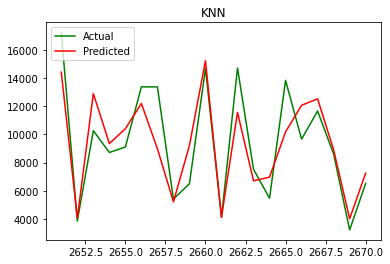

In [67]:
pred1=pd.DataFrame(knnPred)

fig, ax = plt.subplots()
ax.plot(actual.tail(20), color = 'green', label = 'Actual')
ax.plot(pred1.tail(20), color = 'red', label = 'Predicted')
plt.title('KNN')
ax.legend(loc = 'upper left')
plt.show()

# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

dtPred=dt.predict(x_test)
print('The predicted price values:\n',dtPred)
print('\n')

dl=list(dtPred)
dm=sum(dl)/len(dl)
dtr2=r2_score(y_test,dtPred)

print('r2 score: ',dtr2)
print('Mean Absolute Error: ',mean_absolute_error(y_test,dtPred)/dm)
print('Mean Squared Error: ',mean_squared_error(y_test,dtPred)/dm)
print('Root Mean Square Error: ',((mean_squared_error(y_test,dtPred))**0.5)/dm)

The predicted price values:
 [ 6752.  7408. 12819. ...  9345.  5678.  6513.]


r2 score:  0.7378240292212919
Mean Absolute Error:  0.1446651316369835
Mean Squared Error:  633.1239136582735
Root Mean Square Error:  0.2656197942322252


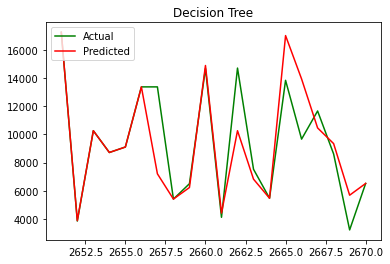

In [69]:
pred2=pd.DataFrame(dtPred)

fig, ax = plt.subplots()
ax.plot(actual.tail(20), color = 'green', label = 'Actual')
ax.plot(pred2.tail(20), color = 'red', label = 'Predicted')
ax.legend(loc = 'upper left')
plt.title('Decision Tree')
plt.show()

# Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

lrPred=lr.predict(x_test)
print('The predicted price values:\n',lrPred)
print('\n')

ll=list(dtPred)
lm=sum(ll)/len(ll)
lrr2=r2_score(y_test,lrPred)

print('r2 score: ',lrr2)
print('Mean Absolute Error: ',mean_absolute_error(y_test,lrPred)/lm)
print('Mean Squared Error: ',mean_squared_error(y_test,lrPred)/lm)
print('Root Mean Square Errotr: ',((mean_squared_error(y_test,lrPred))**0.5)/lm)

The predicted price values:
 [[ 7475.28486975]
 [10932.24874725]
 [13802.1363129 ]
 ...
 [10257.70161304]
 [ 6146.08700447]
 [ 9805.26505074]]


r2 score:  0.6628883392846994
Mean Absolute Error:  0.21587728052608052
Mean Squared Error:  814.0847284286839
Root Mean Square Errotr:  0.3011971658954883


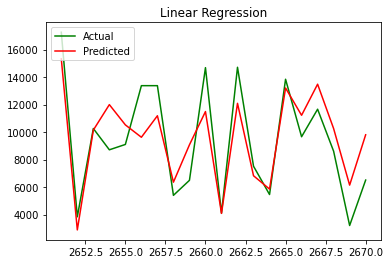

In [71]:
pred3=pd.DataFrame(lrPred)

fig, ax = plt.subplots()
ax.plot(actual.tail(20), color = 'green', label = 'Actual')
ax.plot(pred3.tail(20), color = 'red', label = 'Predicted')
ax.legend(loc = 'upper left')
plt.title('Linear Regression')
plt.show()

# Locally weighted Regression

In [72]:

# tou=0.8
# for r in range(len(x_test)):
#     try:
#         wt = np.exp(-np.sum((x_train - x_test[r])**2, axis=1) / (2*tou)**2)
#         w=np.diag(wt)
#         fact1=np.linalg.inv(x_train.T.dot(w).dot(x_train))
#         parameter=fact1.dot(x_train.T).dot(w).dot(y_train)
#         prediction=x_test[r].dot(parameter)
#     except:
#         pass

# # y_test=np.array(y_test)
# plt.plot(x_train.squeeze(), y_train, 'o')
# plt.plot(x_test.squeeze(), y_test, '*')
# plt.show()
y_train

array([[8586],
       [4174],
       [4226],
       ...,
       [5883],
       [5694],
       [9736]], dtype=int64)

# ARIMA MODEL

In [73]:
from statsmodels.tsa.arima.model import ARIMA

In [74]:
print(df.shape)
train=df.iloc[:-10]
test=df.iloc[-10:]
print(train.shape,test.shape)

(10682, 34)
(10672, 34) (10, 34)


In [75]:
# fitting the model
model=ARIMA(train['Price'],order=(2,1,0))
model=model.fit()
# model.summary()

C:\Users\Harshita V M\Anaconda_pythonCodes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Harshita V M\Anaconda_pythonCodes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Harshita V M\Anaconda_pythonCodes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [76]:
# predictions
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
print(pred)

10672    8520.547646
10673    7609.139683
10674    9091.532034
10675    8401.918689
10676    8371.542614
10677    8620.689552
10678    8464.037984
10679    8486.201230
10680    8523.347670
10681    8491.135117
Name: predicted_mean, dtype: float64


C:\Users\Harshita V M\Anaconda_pythonCodes\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

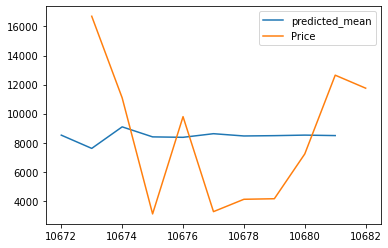

In [77]:
# Actual value Vs Predicted value
pred.plot(legend=True)
test['Price'].plot(legend=True)

In [78]:
l1=list(pred)
am=sum(l1)/len(l1)

In [79]:
ar2=r2_score(test['Price'],pred)
print('r2 score: ',ar2)
print('Mean Absolute Error: ',mean_absolute_error(test['Price'],pred)/am)
print('Mean Squared Error: ',mean_squared_error(test['Price'],pred)/am)
print('Root Mean Square Error: ',(mean_squared_error(test['Price'],pred))**0.5/am)

r2 score:  -0.057385964246235543
Mean Absolute Error:  0.49226612927321595
Mean Squared Error:  2498.4585461534584
Root Mean Square Error:  0.5435030641632762


# Random Forest Regression

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(x_train,y_train)

rfPred=rf.predict(x_test)
print('The predicted price values:\n',rfPred)
print('\n')

rl=list(dtPred)
rm=sum(rl)/len(rl)
rfr2=r2_score(y_test,rfPred)
rfmae=mean_absolute_error(y_test,rfPred)/rm
rfmse=mean_squared_error(y_test,rfPred)/rm
rfrmse=((mean_squared_error(y_test,rfPred))**0.5)/rm

print('r2 score: ',rfr2)
print('Mean Absolute Error: ',rfmae)
print('Mean Squared Error: ',rfmse)
print('Root Mean Square Error: ',rfrmse)

C:\Users\Harshita V M\AppData\Local\Temp\ipykernel_20464\291072638.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


The predicted price values:
 [ 7540.1         9403.03       12915.575      ...  9018.29
  4748.89244444  6590.43      ]


r2 score:  0.8354497743750587
Mean Absolute Error:  0.12743081186172506
Mean Squared Error:  397.3693032644449
Root Mean Square Error:  0.21043270342759843


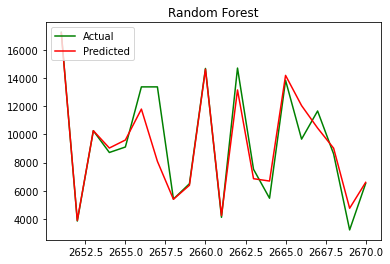

In [81]:
pred4=pd.DataFrame(rfPred)

fig, ax = plt.subplots()
ax.plot(actual.tail(20), color = 'green', label = 'Actual')
ax.plot(pred4.tail(20), color = 'red', label = 'Predicted')
ax.legend(loc = 'upper left')
plt.title('Random Forest')
plt.show()

# Multi Layer Perceptron

In [82]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(max_iter=500,activation='relu')
mlp.fit(x_train,y_train)

mlpPred=mlp.predict(x_test)
mlpPred

ml=list(dtPred)
mm=sum(ml)/len(ml)
mlpr2=r2_score(y_test,mlpPred)

print('r2 score: ',mlpr2)
print('Mean Absolute Error: ',mean_absolute_error(y_test,mlpPred)/mm)
print('Mean Squared Error: ',mean_squared_error(y_test,mlpPred)/mm)
print('Root Mean Square Error: ',((mean_squared_error(y_test,mlpPred))**0.5)/mm)

C:\Users\Harshita V M\Anaconda_pythonCodes\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score:  0.721714118082081
Mean Absolute Error:  0.1492280605753579
Mean Squared Error:  672.0274407772908
Root Mean Square Error:  0.2736589023135783


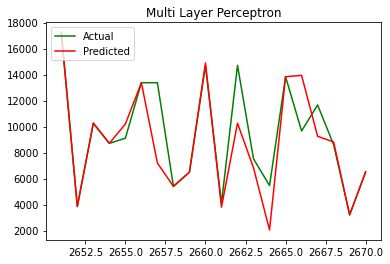

In [83]:
pred5=pd.DataFrame(mlpPred)

fig, ax = plt.subplots()
ax.plot(actual.tail(20), color = 'green', label = 'Actual')
ax.plot(pred5.tail(20), color = 'red', label = 'Predicted')
ax.legend(loc = 'upper left')
plt.title('Multi Layer Perceptron')
plt.show()

In [84]:
score_df=pd.DataFrame({'Model': ['K-Nearest Neighbour','Linear Regression','MultiLayer Perceptron','Decision Tree','Random Forest'], 
                       'Accuracy': [ knnr2*100,lrr2*100,mlpr2*100,dtr2*100, rfr2*100]})
score_df

,Model,Accuracy
0,K-Nearest Neighbour,59.419043
1,Linear Regression,66.288834
2,MultiLayer Perceptron,72.171412
3,Decision Tree,73.782403
4,Random Forest,83.544977


In [85]:
algo={'K Nearest Neighbour':knnr2*100,
      'Linear Regression':lrr2*100,
      'MultiLayer Perceptron':mlpr2*100,
      'Decision Tree':dtr2*100,
      'Random Forest':rfr2*100}
models=list(algo.keys())
accuracy=list(algo.values())

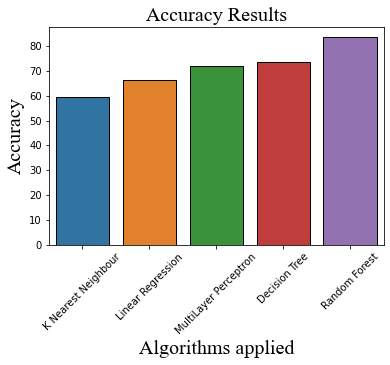

In [86]:
# Accuracy
plt.subplots(figsize=(6,4))
sns.barplot(x=models, y=accuracy,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Accuracy Results",fontdict=font_style )
plt.ylabel("Accuracy", fontdict=font_style)
plt.xlabel("Algorithms applied", fontdict=font_style)
plt.xticks(rotation=45)
plt.show()

In [87]:
ma=[0.19342702,
    mean_absolute_error(y_test,lrPred)/lm,
    mean_absolute_error(y_test,mlpPred)/mm,
    mean_absolute_error(y_test,dtPred)/dm,
    rfmae]
ma

[0.19342702,
 0.21587728052608052,
 0.1492280605753579,
 0.1446651316369835,
 0.12743081186172506]

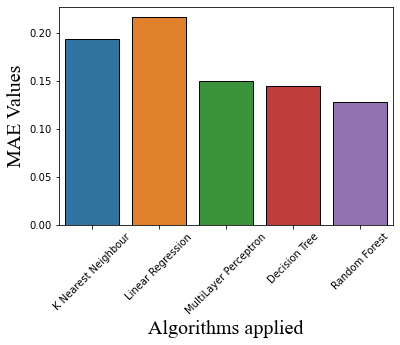

In [88]:
# MAE
plt.subplots(figsize=(6,4))
sns.barplot(x=models, y=ma,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
# plt.title("Accuracy Results",fontdict=font_style )
plt.ylabel("MAE Values", fontdict=font_style)
plt.xlabel("Algorithms applied", fontdict=font_style)
plt.xticks(rotation=45)
plt.show()

In [89]:
rms=[0.33419137,
     mean_squared_error(y_test,lrPred)**0.5/lm,
     mean_squared_error(y_test,mlpPred)**0.5/mm,
     mean_squared_error(y_test,dtPred)**0.5/dm,
     rfrmse]
rms

[0.33419137,
 0.3011971658954883,
 0.2736589023135783,
 0.2656197942322252,
 0.21043270342759843]

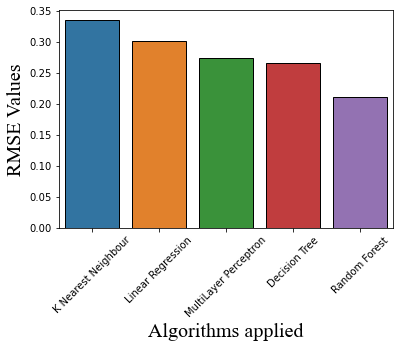

In [90]:
# RMSE
plt.subplots(figsize=(6,4))
sns.barplot(x=models, y=rms,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
# plt.title("Accuracy Results",fontdict=font_style )
plt.ylabel("RMSE Values", fontdict=font_style)
plt.xlabel("Algorithms applied", fontdict=font_style)
plt.xticks(rotation=45)
plt.show()

In [91]:
ms=[991.03321407,
    mean_squared_error(y_test,lrPred)/lm,
    mean_squared_error(y_test,mlpPred)/mm,
    mean_squared_error(y_test,dtPred)/dm,
    rfmse]
ms

[991.03321407,
 814.0847284286839,
 672.0274407772908,
 633.1239136582735,
 397.3693032644449]

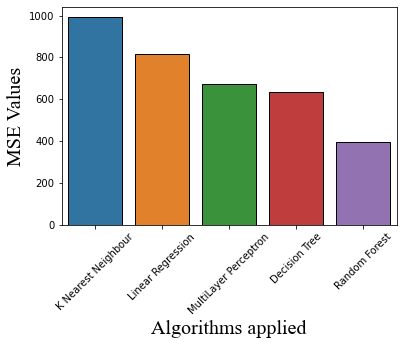

In [92]:
# MSE
plt.subplots(figsize=(6,4))
sns.barplot(x=models, y=ms,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
# plt.title("Accuracy Results",fontdict=font_style )
plt.ylabel("MSE Values", fontdict=font_style)
plt.xlabel("Algorithms applied", fontdict=font_style)
plt.xticks(rotation=45)
plt.show()

In [93]:
# n=list(knnPred)
# mean=sum(n)/len(n)
# mean

# m=(mean_squared_error(y_test,knnPred)**0.5)/mean
# m

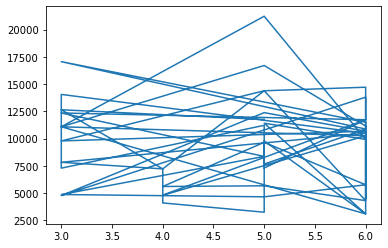

In [94]:
plt.plot(df['Journey_month'].tail(50),df['Price'].tail(50))
plt.show()

Pickling the best model

In [95]:
import pickle

pickle.dump(rf,open('bestmodel.pkl','wb'))
pickled_model=pickle.load(open('bestmodel.pkl','rb'))